In [9]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns

#configurando carteira!


In [7]:
ativos = [
"BPAC11.SA"
,"ITUB3.SA"
,"VALE3.SA"
,"EGIE3.SA"
,"WEGE3.SA"
,"IVVB11.SA"

]


#importando os dados
inicio = "2018-01-01"
fim = "2023-12-31"

carteira = yf.download(ativos,start=inicio,end = fim)["Adj Close"]
display(carteira)

[*********************100%%**********************]  6 of 6 completed


Ticker,BPAC11.SA,EGIE3.SA,ITUB3.SA,IVVB11.SA,VALE3.SA,WEGE3.SA
Date,,,,,,
2018-01-02,3.879363,19.145195,18.409052,92.120003,27.350489,8.752857
2018-01-03,3.916308,19.016565,18.552567,92.099998,27.186596,8.619922
2018-01-04,3.930677,18.770010,18.758278,92.419998,27.298040,8.535961
2018-01-05,3.995664,18.866486,18.887461,92.800003,27.724169,8.570943
2018-01-08,4.044626,18.973684,18.782200,93.360001,28.340403,8.640910
...,...,...,...,...,...,...
2023-12-21,36.511269,44.422287,27.029526,256.799988,76.970001,36.088661
2023-12-22,36.650700,44.570000,27.241220,256.250000,76.389999,36.207664
2023-12-26,37.138714,44.790001,27.558762,256.149994,76.660004,36.415928


In [8]:
pesos = np.array([0.1,0.1,0.1,0.1,0.1,0.1])

<Axes: xlabel='Date'>

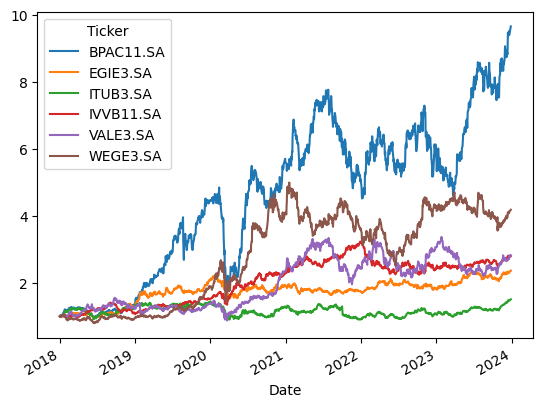

In [10]:
(carteira/carteira.iloc[0]).plot()

# retorno diario e acumulado


In [12]:
#retorno diario -> variacao no dia
#retorno acumulado -> retorno total ao longo do tempo

retornos = carteira.pct_change()

<Axes: xlabel='Date'>

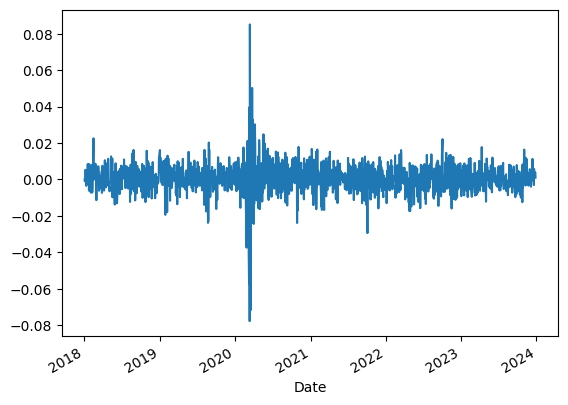

In [15]:
#retorno diario da carteira
retorno_carteira = (retornos*pesos).sum(axis = 1)
retorno_carteira.plot()

# Retorno acumulado

<Axes: xlabel='Date'>

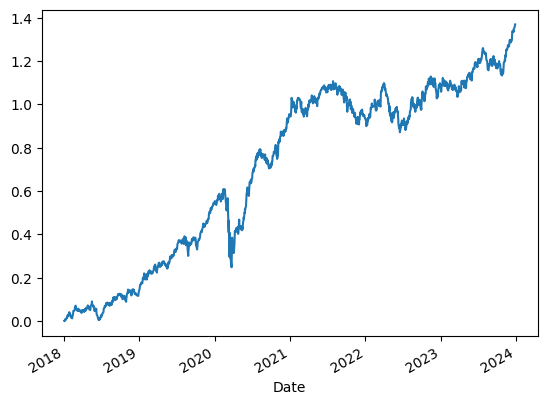

In [17]:
retorno_acumulado_carteira = (1 + retorno_carteira).cumprod() - 1
retorno_acumulado_carteira.plot()

# Comparativo de desempenho

In [18]:
ibov = yf.download("^BVSP", start=inicio,end= fim) ["Adj Close"]
ibov_retorno_diario = ibov.pct_change()
retorno_acumulado_ibov = (1 + ibov_retorno_diario ).cumprod() - 1


[*********************100%%**********************]  1 of 1 completed


In [19]:
retorno_portfolio = pd.DataFrame()
retorno_portfolio["Retorno Carteira"] = retorno_acumulado_carteira

retorno_portfolio["Retorno IBOV"] = retorno_acumulado_ibov
retorno_portfolio = retorno_portfolio.dropna()

<Axes: xlabel='Date'>

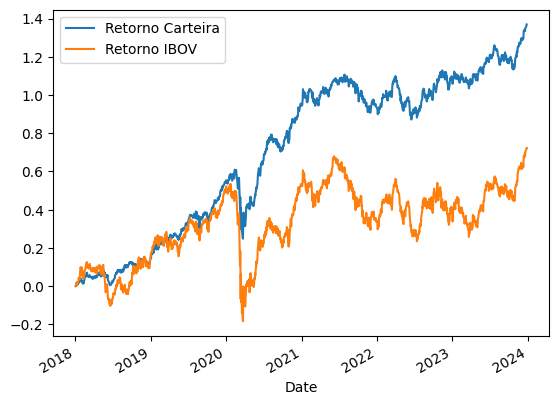

In [21]:
retorno_portfolio.plot()